<img src='images/logo_avanade.png' style="width:60%;height:60%;">

# **Data Science Fundamentals Training (06|04|2021)**

## **Lab 2: Prediction of House prices using a Machine Learning Linear Model**

## Step1- Import the required libraries

In [35]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

#used in correlation
import scipy.stats as ss
import numpy as np
import itertools

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

## Step 2- Load the cleaned version of house price data

# Varables :
<br>Here's a brief version of what you'll find in the data description file.:
<br> **SalePrice** </br> : the property's sale price in dollars. This is the target variable that you're trying to predict.:
<br>**MSZoning**: Identifies the general zoning classification of the sale.
<br>**GrLivArea**: Above grade (ground) living area square feet.
<br>**Utilities**: Type of utilities available.
<br>**OverallQual**: Rates the overall material and finish of the house.
<br>**YearBuilt**: Original construction date.
<br>**TotalBsmtSF**: Total square feet of basement area.
<br>**Heating**: Type of heating.
<br>**HeatingQC**: Heating quality and condition.
<br>**CentralAir**: Central air conditioning.
<br>**FullBath**: Full bathrooms above grade.
<br>**BedroomAbvGr**: Bedrooms above grade (does NOT include basement bedrooms)
<br>**KitchenAbvGr**: Kitchens above grade
<br>**GarageCars**: Size of garage in car capacity.
<br>**PoolArea**: Pool area in square feet.

In [66]:
# !!!Always check the data you are loading!!! when saving the csv file, use the option  index = False if needed.
house_price_data = pd.read_csv("data/house_price_data_cleaned.csv")

# house_price_data = pd.read_csv("/dbfs/FileStore/house_price_data_cleaned.csv")

print(house_price_data.head(3))

house_price_data.describe(include = "all").T

   Unnamed: 0 MSZoning  GrLivArea Utilities  OverallQual  YearBuilt  \
0           0       RL       1710    AllPub            7       2003   
1           1       RL       1262    AllPub            6       1976   
2           2       RL       1786    AllPub            7       2001   

   TotalBsmtSF Heating HeatingQC CentralAir  FullBath  BedroomAbvGr  \
0        856.0    GasA        Ex          Y         2             3   
1       1262.0    GasA        Ex          Y         2             3   
2        920.0    GasA        Ex          Y         2             3   

   KitchenAbvGr  GarageCars  PoolArea  SalePrice  SalePrice_log  
0             1           2         0     208500      12.247694  
1             1           2         0     181500      12.109011  
2             1           2         0     223500      12.317167  


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1459,NaN,NaN,NaN,729,421.321,0,364.5,729,1093.5,1458
MSZoning,1459,5,RL,1150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GrLivArea,1459,NaN,NaN,NaN,1515.64,525.617,334,1129,1464,1777.5,5642
Utilities,1459,2,AllPub,1458,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallQual,1459,NaN,NaN,NaN,6.10007,1.38317,1,5,6,7,10
YearBuilt,1459,NaN,NaN,NaN,1971.27,30.2128,1872,1954,1973,2000,2010
TotalBsmtSF,1459,NaN,NaN,NaN,1056.48,434.335,0,799,1008,1277.5,6110
Heating,1459,6,GasA,1427,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HeatingQC,1459,5,Ex,782,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CentralAir,1459,2,Y,1364,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
## Drop the additional variable
house_price_data.drop(["Unnamed: 0"], axis = 1, inplace = True)
house_price_data.head()

,MSZoning,GrLivArea,Utilities,OverallQual,YearBuilt,TotalBsmtSF,Heating,HeatingQC,CentralAir,FullBath,BedroomAbvGr,KitchenAbvGr,GarageCars,PoolArea,SalePrice,SalePrice_log
0,RL,1710,AllPub,7,2003,856.0,GasA,Ex,Y,2,3,1,2,0,208500,12.247694
1,RL,1262,AllPub,6,1976,1262.0,GasA,Ex,Y,2,3,1,2,0,181500,12.109011
2,RL,1786,AllPub,7,2001,920.0,GasA,Ex,Y,2,3,1,2,0,223500,12.317167
3,RL,1717,AllPub,7,1915,756.0,GasA,Gd,Y,1,3,1,3,0,140000,11.849398
4,RL,2198,AllPub,8,2000,1145.0,GasA,Ex,Y,2,4,1,3,0,250000,12.429216


In [16]:
## Check for the missing data
house_price_data.isna().sum()

MSZoning         0
GrLivArea        0
Utilities        0
OverallQual      0
YearBuilt        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
FullBath         0
BedroomAbvGr     0
KitchenAbvGr     0
GarageCars       0
PoolArea         0
SalePrice        0
SalePrice_log    0
dtype: int64

## Step3- Check the normally assumption before applying the model

#### Remember that the linear model is defined by  
$$Y = \beta_O + \beta_1X_1 +\beta_2X_2 + \beta_3X_3 + \ldots + \beta_pX_p + \epsilon \ \ with \ \ \epsilon \sim \mathcal{N}(0, \sigma^2)$$ 
$Y$ need to be Gaussian to have a consistent estimator of the parameters. You can still fit the linear model on other distributions but the consistency of the parameters estimated will not be guarenteed.

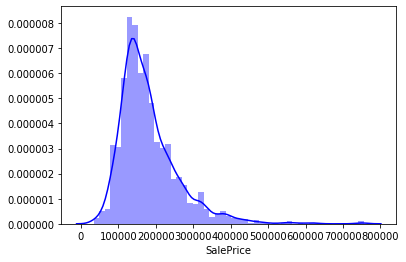

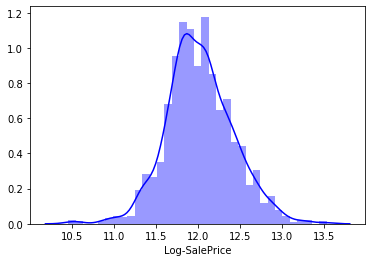

In [28]:
plt.figure()
sns.distplot(house_price_data["SalePrice"], kde = True, color = 'blue')
plt.show()
sns.distplot(np.log(house_price_data["SalePrice"]), hist = True, kde = True, color = 'blue')
plt.xlabel("Log-SalePrice")
plt.show()

- **The distribution of our main outcome of interest  SalePrice seems to have a big tail on the right. That is not an acceptable behaviour of a gaussian distribution.**

- **The log transformation seems to produce a symetric distribution which has the expected behaviour of a Gaussian distribution.**

- **We will then use the log of the SalePrice as our main outcome  for the Linear Regression**

In [21]:
house_price_data["SalePrice_log"] = np.log(house_price_data["SalePrice"])
house_price_data["SalePrice_log"].isna().sum()

0

## Step 4-1- Build the model on continuous features

In [25]:
## extract the countinuous features
cont_features = [col for col in house_price_data.columns if house_price_data[col].dtype != 'object']
cont_features.remove("SalePrice_log")
cont_features.remove("SalePrice")
cont_features

['GrLivArea',
 'OverallQual',
 'YearBuilt',
 'TotalBsmtSF',
 'FullBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'GarageCars',
 'PoolArea']

## Scaling the continuous features. The order of magnitude is too big between all the features with a very high level of discrepency.

- The StandardScaler is the most used scaling technic which attemp to center the data (the new mean is 0) and the variance is 1
$$x_{new} = \frac{x - \bar{x}}{\sigma(x)}$$
- The MinMaxScaler is another very usefull scaling technic which attempts to scale the data such that the new data is between a range $left$ and $right$.
$$x_{trans} = \frac{x - \min(x)}{\max(x) - \min(x)}; \ \ x_{new} = x_{trans}(right - left) - left$$

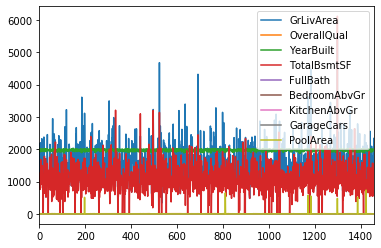

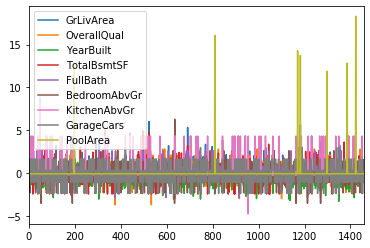

In [34]:
#Get data with continious features only
X_cont = house_price_data[cont_features]
y = house_price_data['SalePrice']
ylog = house_price_data['SalePrice_log']

## Scale the data before fitting the model
scaler1 = StandardScaler()
X_cont_scaled  = pd.DataFrame(scaler1.fit_transform(X_cont), columns = X_cont.columns)
X_cont.plot()
X_cont_scaled.plot()

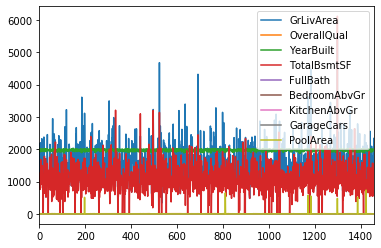

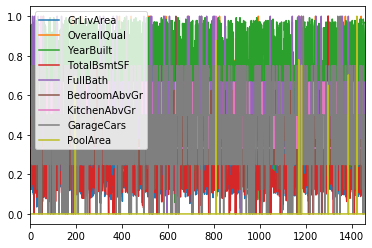

In [36]:
#Get data with continious features only
X_cont = house_price_data[cont_features]
y = house_price_data['SalePrice']
ylog = house_price_data['SalePrice_log']

## Scale the data before fitting the model
scaler2 = MinMaxScaler()
X_cont_scaled2  = pd.DataFrame(scaler2.fit_transform(X_cont), columns = X_cont.columns)
X_cont.plot()
X_cont_scaled2.plot()

In [67]:
#Get data with continuous features only
X_cont = house_price_data[cont_features]
y = house_price_data['SalePrice']

#Split data on training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_cont, y, test_size=0.33, random_state=42)

## Scale the data before fitting the model
scaler1 = StandardScaler()
scaler1.fit(X_train)
X_train_scaled = scaler1.transform(X_train)
Lreg = LinearRegression().fit(X_train_scaled, y_train)

#evaluate on training data
y_pred_train = Lreg.predict(X_train_scaled)
print("Root Mean Squared error on Training data : ", np.sqrt(mse(y_pred_train, y_train)))


# Inference + evaluation on the testing data
y_pred_test = Lreg.predict(scaler1.transform(X_test))
print("Root Mean Squared Error on Testing data : ", np.sqrt(mse(y_pred_test, y_test)))

## 
print("Root Mean Squared Error for the Naïve estimator : ", np.sqrt(np.mean((y_test - y_test.mean())**2)))

Root Mean Squared error on Training data :  36650.21976803084
Root Mean Squared Error on Testing data :  46296.7116002956
Root Mean Squared Error for the Naïve estimator :  86822.79636673271


In [68]:
ylog = house_price_data['SalePrice_log']

## Split the data into training and testing
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_cont, ylog, test_size=0.33, random_state=42)

## Scale the data before fitting the model
scaler2 = StandardScaler()
scaler2.fit(X_train_log)
X_train_scaled2 = scaler2.transform(X_train_log)

## Fit the linear model on the scaled data with the log of house price as the primary outcome
Lreg2 = LinearRegression().fit(X_train_scaled2, y_train_log)

# Inference + evaluation on the testing data
y_pred_test_log = Lreg2.predict(scaler2.transform(X_test_log))
print("Root Mean Squared Error on Testing data on the log scale: ", np.sqrt(mse(y_pred_test_log, y_test_log)))
print('')
print("Root Mean Squared Error on Testing data on the natural scale: ", np.sqrt(mse(np.exp(y_pred_test_log), np.exp(y_test_log))))
print('')

Root Mean Squared Error on Testing data on the log scale:  0.19936908014001845

Root Mean Squared Error on Testing data on the natural scale:  36581.80520749839



In [ ]:
## Uncomment if you want the result using the MinMaxScaler

# ylog = house_price_data['SalePrice_log']

## Split the data into training and testing
# X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_cont, ylog, test_size=0.33, random_state=42)

## Scale the data before fitting the model
# scaler2 = MinMaxScaler()
# scaler2.fit(X_train_log)
# X_train_scaled2 = scaler2.transform(X_train_log)

## Fit the linear model on the scaled data with the log of house price as the primary outcome
# Lreg2 = LinearRegression().fit(X_train_scaled2, y_train_log)

# Inference + evaluation on the testing data
# y_pred_test_log = Lreg2.predict(scaler2.transform(X_test_log))
# print("Root Mean Squared Error on Testing data on the log scale: ", np.sqrt(mse(y_pred_test_log, y_test_log)))
# print('')
# print("Root Mean Squared Error on Testing data on the natural scale: ", np.sqrt(mse(np.exp(y_pred_test_log), np.exp(y_test_log))))
# print('')

## **Primary results and partial take away**
- The first model which model the **SalePrice** as the linear combination of the features perform better on the training data as expected based on the RMSE and the generalization error (RMSE on the testing data) is not far away from the training error.

- A naïve approach which predict the price in the testing set as the **average price** is almost two times worst... We are begening to see a machine learning impact here.

- The last model which consider the **log transformation of the SalePrice** as the primary outcome in the Linear Model is better than the first one as expected since the **normality assumption is fulfilled** in this case. It's always good to know at least few hypothesis underlying the model we are trying to use.

- In the next part we will see if we have an improvement of our model by adding categorical features!!! **Stay tuned!**

## Step 4-2- Build the model on continuous + categorical features

In [69]:
## extract the categorical features
cat_features = [col for col in house_price_data.columns if house_price_data[col].dtype == 'object']
cat_features

['MSZoning', 'Utilities', 'Heating', 'HeatingQC', 'CentralAir']

In [70]:
house_price_data_new = house_price_data.copy()
house_price_data_new.drop(["SalePrice"], axis=1, inplace=True)
house_price_data_new.columns

Index(['Unnamed: 0', 'MSZoning', 'GrLivArea', 'Utilities', 'OverallQual',
       'YearBuilt', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageCars', 'PoolArea',
       'SalePrice_log'],
      dtype='object')

In [71]:
## Transform the categorical covariates into 0-1 variables
house_price_data_dummy = pd.get_dummies(house_price_data_new, columns = cat_features, drop_first = False)
house_price_data_dummy.head()

,Unnamed: 0,GrLivArea,OverallQual,YearBuilt,TotalBsmtSF,FullBath,BedroomAbvGr,KitchenAbvGr,GarageCars,PoolArea,...,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y
0,0,1710,7,2003,856.0,2,3,1,2,0,...,0,0,0,1,0,0,0,0,0,1
1,1,1262,6,1976,1262.0,2,3,1,2,0,...,0,0,0,1,0,0,0,0,0,1
2,2,1786,7,2001,920.0,2,3,1,2,0,...,0,0,0,1,0,0,0,0,0,1
3,3,1717,7,1915,756.0,1,3,1,3,0,...,0,0,0,0,0,1,0,0,0,1
4,4,2198,8,2000,1145.0,2,4,1,3,0,...,0,0,0,1,0,0,0,0,0,1


In [72]:
ylog = house_price_data_dummy['SalePrice_log']
X_cont_cat = house_price_data_dummy['SalePrice_log']
## Split the data into training and testing
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    house_price_data_dummy.drop(columns=['SalePrice_log']), house_price_data_dummy['SalePrice_log'], test_size=0.33, random_state=42)

## Scale the data before fitting the model
scaler2 = MinMaxScaler()
scaler2.fit(X_train_log)
X_train_scaled2 = scaler2.transform(X_train_log)

## Fit the linear model on the scaled data with the log of house price as the primary outcome
Lreg2 = LinearRegression().fit(X_train_scaled2, y_train_log)

# Inference + evaluation on the testing data
y_pred_test_log = Lreg2.predict(scaler2.transform(X_test_log))
print("Root Mean Squared Error on Testing data on the log scale: ", np.sqrt(mse(y_pred_test_log, y_test_log)))
print('')
print("Root Mean Squared Error on Testing data on the natural scale: ", np.sqrt(mse(np.exp(y_pred_test_log), np.exp(y_test_log))))
print('')

Root Mean Squared Error on Testing data on the log scale:  0.18583189484949214

Root Mean Squared Error on Testing data on the natural scale:  36709.33313314946



## **Global Conclusion**
- The added value of categorical covariates were limited for this example 
- Always remember to drop one variable while using OHE for a linear model, Otherwise you will end up with an overparameterized model.
- For the Linear model, always use the MinMaxSaler after one hot encoding because the standard scaling have a side effect of distorting the distribution of the encoded covariates leading to uninterpretable parameters
- Hope you enjoyed this application of Linear Model to predict the saleprice of a house.